In [3]:
from sklearn.ensemble import ExtraTreesClassifier
import glob
import librosa
import librosa.display
import numpy as np
import pandas as pd
import _pickle as pickle


def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
                                              sr=sample_rate).T, axis=0)
    return mfccs, chroma, mel, contrast, tonnetz


def parse_audio_files(path):
    features, labels = np.empty((0, 193)), np.empty(0)
    labels = []
    for fn in glob.glob(path):
        try:
            mfccs, chroma, mel, contrast, tonnetz = extract_feature(fn)
        except Exception as e:
            print("Error encountered while parsing file: ", fn)
            continue
        ext_features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
        features = np.vstack([features, ext_features])
        labels = np.append(labels, fn.split("_")[3].split(".")[0])

    return np.array(features), np.array(labels)


tr_features, tr_labels = parse_audio_files('./train_80/*.wav')
ts_features, ts_labels = parse_audio_files('./test_20/*.wav')

tr_features = np.array(tr_features, dtype=pd.Series)
tr_labels = np.array(tr_labels, dtype=pd.Series)

ts_features = np.array(ts_features, dtype=pd.Series)
ts_labels = np.array(ts_labels, dtype=pd.Series)

# Score on the training set was:0.9964285714285716
exported_pipeline = ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.25, min_samples_leaf=1,
                                         min_samples_split=8, n_estimators=100)

exported_pipeline.fit(tr_features, tr_labels)

filename = 'genetic_generated_pipeline.sav'

pickle.dump(exported_pipeline, open(filename, 'wb'), protocol=2)

print('Model Saved..')

Model Saved..


Accuracy Score: 0.998214285714
Number of correct prediction: 559 out of 560


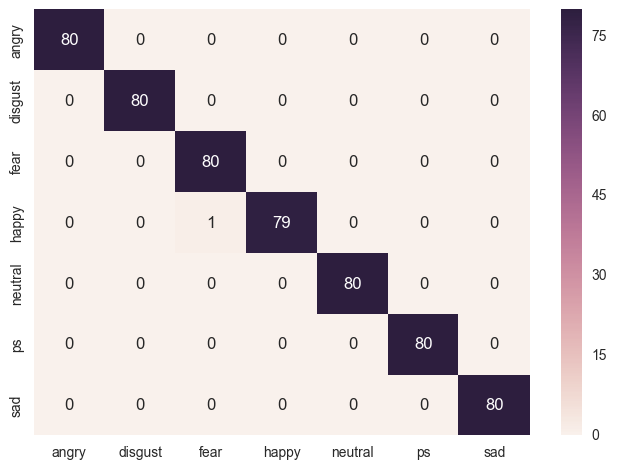

In [4]:
import glob
import librosa
import librosa.display
import numpy as np
import _pickle as pickle
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn


# Method to extract features from speech using librosa


def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
                                              sr=sample_rate).T, axis=0)
    return mfccs, chroma, mel, contrast, tonnetz


# List to store file names
target_files = []

# Method to extract label name and extract features from audio file


def parse_audio_files(path):
    labels = []
    features = np.empty((0, 193))
    for fn in glob.glob(path):
        try:
            mfccs, chroma, mel, contrast, tonnetz = extract_feature(fn)
        except Exception as e:
            print("Error encountered while parsing file: ", fn)
            continue
        ext_features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
        features = np.vstack([features, ext_features])
        labels = np.append(labels, fn.split("_")[3].split(".")[0])
        target_files.append(fn)
    return np.array(features), np.array(labels)


# Get labels and features of audion file of specified path
ts_features, ts_labels = parse_audio_files('./test_20/*.wav')

# Convert features and labels to the pandas Series data type
ts_features = np.array(ts_features, dtype=pd.Series)
ts_labels = np.array(ts_labels, dtype=pd.Series)

# Trained Model file name
filename = 'genetic_generated_pipeline.sav'

# Load saved model from file
model = pickle.load(open(filename, 'rb'))

# Predict the emotion class
prediction = model.predict(ts_features)

# True labels
test_true = ts_labels

# List to store prediction
test_predicted = []

# Iterate over model prediction and store it into list
for i, val in enumerate(prediction):
    test_predicted.append(val)


# Accuracy score of model
print('Accuracy Score:', accuracy_score(test_true, test_predicted))

# Number of corrected prediction
print('Number of correct prediction:', accuracy_score(test_true, test_predicted, normalize=False), 'out of', len(ts_labels))

# Plotting confusion matrix
matrix = confusion_matrix(test_true, test_predicted)
classes = list(set(ts_labels))
classes.sort()
df = pd.DataFrame(matrix, columns=classes, index=classes)
plt.figure()
sn.heatmap(df, annot=True)
plt.show()

[learning_curve] Training set sizes: [ 195  636 1077 1518 1959]


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   23.6s finished
C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


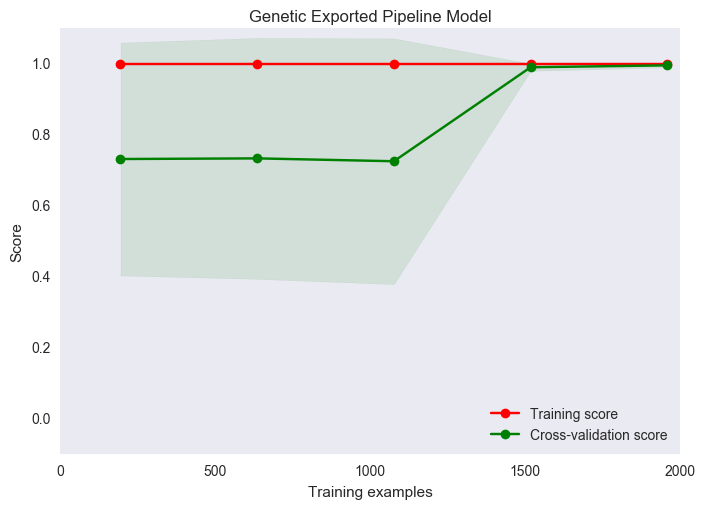

Model Saved..


In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import glob
import librosa
import librosa.display
import numpy as np
import pandas as pd
import _pickle as pickle
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve


def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
                                              sr=sample_rate).T, axis=0)
    return mfccs, chroma, mel, contrast, tonnetz


def parse_audio_files(path):
    features, labels = np.empty((0, 193)), np.empty(0)
    labels = []
    for fn in glob.glob(path):
        try:
            mfccs, chroma, mel, contrast, tonnetz = extract_feature(fn)
        except Exception as e:
            print("Error encountered while parsing file: ", fn)
            continue
        ext_features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
        features = np.vstack([features, ext_features])
        labels = np.append(labels, fn.split("_")[3].split(".")[0])

    return np.array(features), np.array(labels)


tr_features, tr_labels = parse_audio_files('./train_80/*.wav')
ts_features, ts_labels = parse_audio_files('./test_20/*.wav')

tr_features = np.array(tr_features, dtype=pd.Series)
tr_labels = np.array(tr_labels, dtype=pd.Series)

ts_features = np.array(ts_features, dtype=pd.Series)
ts_labels = np.array(ts_labels, dtype=pd.Series)

# Score on the training set was:0.9964285714285716
exported_pipeline = ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.25, min_samples_leaf=1,
                                         min_samples_split=8, n_estimators=100)

exported_pipeline.fit(tr_features, tr_labels)

train_sizes, train_scores, test_scores = learning_curve(exported_pipeline, tr_features, tr_labels, n_jobs=-1, cv=8,
                                                        train_sizes=np.linspace(.1, 1.0, 5), verbose=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Genetic Exported Pipeline Model")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
line_up = plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
line_down = plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.ylim(-.1, 1.1)
plt.legend(loc="lower right")
plt.show()

filename = 'genetic_generated_pipeline.sav'

pickle.dump(exported_pipeline, open(filename, 'wb'), protocol=2)

print('Model Saved..')